In [9]:
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import math

In [8]:
X = 0

In [7]:
def confronta(s, pos, Sequence):
  global X
  sequenceMin = []
  sequenceMax = []
  for i in range(len(Sequence)):
    if(i != pos):
      if Sequence[i] < s:
        sequenceMin.append(Sequence[i])
        X += 1
      else:
        sequenceMax.append(Sequence[i])
        X += 1
  return [sequenceMin, sequenceMax]

In [6]:
def LVQuickSort(Sequence):
  if(len(Sequence) <= 1): return Sequence
  pos = random.randint(0, len(Sequence)-1)
  s = Sequence[pos]
  confronto = confronta(s, pos, Sequence)
  sequenceMin = LVQuickSort(confronto[0])
  sequenceMax = LVQuickSort(confronto[1])

  # necessario per avere in output un array senza troncamenti
  sorted_sequence = sequenceMin
  sorted_sequence.extend([s]) # la funzione extend concatena
  sorted_sequence.extend(sequenceMax)

  return sorted_sequence

In [5]:
def random_array(n):
  arr = []
  for i in range(n):
    arr.append(random.randint(0, n))  
  return arr

In [26]:
n = 10**4
R = 10**5
Xr = []

In [28]:
for i in tqdm(range(R)):
  array = random_array(n)
  X = 0
  LVQuickSort(array)
  Xr.append(X)


100%|██████████| 100000/100000 [34:46<00:00, 47.92it/s]


In [29]:
print(Xr)

[149945, 159831, 163640, 153966, 155322, 147780, 148853, 154515, 157655, 155258, 163981, 153450, 145097, 154539, 156912, 150337, 157190, 151772, 149515, 150824, 149990, 154501, 149717, 153052, 149998, 152118, 157433, 167219, 165189, 152306, 161164, 172347, 155748, 158156, 151632, 158168, 155842, 152443, 151526, 161137, 156465, 162265, 163262, 149485, 151418, 159870, 159201, 148323, 168191, 164499, 160885, 148983, 159032, 145873, 161275, 161181, 159557, 146975, 160992, 165182, 148150, 154659, 155706, 158569, 147564, 170618, 158520, 154236, 155007, 184578, 152193, 150416, 148863, 151950, 153877, 151149, 150921, 159584, 153427, 148015, 162569, 151278, 159279, 153931, 150451, 151552, 153647, 160764, 158379, 154682, 156290, 159607, 146817, 171888, 162180, 154103, 156138, 151242, 154452, 150851, 151662, 161088, 154125, 150823, 157040, 161942, 157702, 154050, 155392, 156152, 150983, 149104, 151642, 156187, 151302, 152075, 148896, 159438, 159569, 162679, 158911, 153016, 161149, 167447, 154264,

In [17]:
def valore_medio(R,Xr):
  sommatoria = sum(Xr)
  return (1/R) * sommatoria

In [18]:
def deviazione_standard(R,Xr,u):
  sommatoria = 0
  for i in Xr:
    sommatoria += ((i-u)**2)
  return (1/(R-1)) * sommatoria

In [30]:
val_medio = valore_medio(R,Xr)
dev_standard = deviazione_standard(R,Xr,val_medio)

In [31]:
k = 0
for x in Xr:
    if x >= 2*val_medio and x < 3*val_medio:
        k += 1
print(k)

0


In [32]:
print("Frequenza empirica di X: ", k/R)

Frequenza empirica di X:  0.0


In [33]:
k = 0
for x in Xr:
    if x >= 3*val_medio:
        k += 1
print(k)

0


In [34]:
print("Frequenza empirica di X: ", k/R)

Frequenza empirica di X:  0.0


In [35]:
print("Valore medio: " + str(val_medio))
print("Varianza: " + str(dev_standard))
print("Deviazione standard: " + str(math.sqrt(dev_standard)))

Valore medio: 157056.61454
Varianza: 42817729.20433972
Deviazione standard: 6543.52574720538


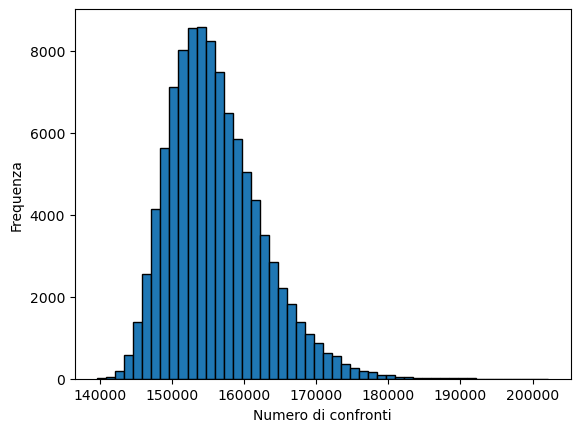

In [36]:
plt.hist(Xr, edgecolor="black", bins=50)
plt.xlabel("Numero di confronti")
plt.ylabel("Frequenza")
plt.show()

In [37]:
v1 = 2
v2 = 3

In [38]:
def markov(mu, val):
  return mu/(val*mu)

In [39]:
print(markov(val_medio, v1))
print(markov(val_medio, v2))

0.5
0.3333333333333333


In [40]:
def chebyshev(mu, val, dev):
    return dev / (((val-1)**2)*(mu**2))

In [41]:
print(chebyshev(val_medio, v1, dev_standard))
print(chebyshev(val_medio, v2, dev_standard))

0.0017358458991370584
0.0004339614747842646
